In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [3]:
attrition_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [4]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [5]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [6]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [7]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EmployeeCount                      1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

In [8]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\ProgramData\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 448       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 1ms/step - loss: 149.4724 - accuracy: 0.7214
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 64.2287 - accuracy: 0.7768
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 18.9695 - accuracy: 0.7532
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 4.9815 - accuracy: 0.3975
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 3.2866 - accuracy: 0.4229
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 2.6733 - accuracy: 0.8267
Epoch 7/100
35/35 [==============================] - 0s 890us/step - loss: 2.2084 - accuracy: 0.8276
Epoch 8/100
35/35 [==============================] - 0s 976us/step - loss: 2.0256 - accuracy: 0.8267
Epoch 9/100
35/35 [==============================] - 0s 919us/step - loss: 1.8977 - accuracy: 0.8276
Epoch 10/100
35/35 [==============================] - 0s 947us/step - loss: 1.7700 - accuracy: 0.82

35/35 [==============================] - 0s 919us/step - loss: 0.4900 - accuracy: 0.8285
Epoch 82/100
35/35 [==============================] - 0s 775us/step - loss: 0.4745 - accuracy: 0.8267
Epoch 83/100
35/35 [==============================] - 0s 775us/step - loss: 0.5225 - accuracy: 0.8294
Epoch 84/100
35/35 [==============================] - 0s 775us/step - loss: 0.4765 - accuracy: 0.8285
Epoch 85/100
35/35 [==============================] - 0s 746us/step - loss: 0.4689 - accuracy: 0.8294
Epoch 86/100
35/35 [==============================] - 0s 919us/step - loss: 0.6065 - accuracy: 0.8267
Epoch 87/100
35/35 [==============================] - 0s 746us/step - loss: 0.4733 - accuracy: 0.8267
Epoch 88/100
35/35 [==============================] - 0s 919us/step - loss: 0.5378 - accuracy: 0.8276
Epoch 89/100
35/35 [==============================] - 0s 947us/step - loss: 0.4691 - accuracy: 0.8285
Epoch 90/100
35/35 [==============================] - 0s 832us/step - loss: 0.4383 - accuracy: 

<AxesSubplot:>

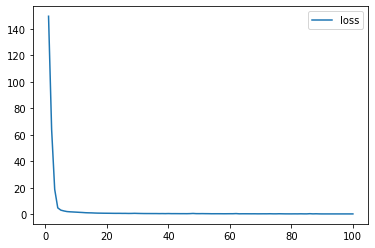

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

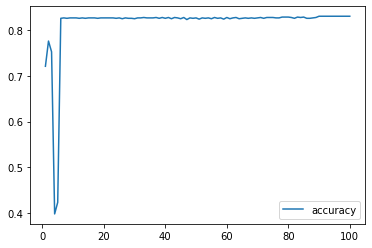

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.7272 - accuracy: 0.8614 - 116ms/epoch - 10ms/step
Loss: 0.7271965742111206, Accuracy: 0.8614130616188049


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 1/35 [..............................] - ETA: 10s - loss: 0.4666 - accuracy: 0.8438
Epoch 1: saving model to checkpoints\weights.01.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.8140
Epoch 2/100
 1/35 [..............................] - ETA: 0s - loss: 0.3758 - accuracy: 0.8750
Epoch 2: saving model to checkpoints\weights.02.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8221
Epoch 3/100
 1/35 [..............................] - ETA: 0s - loss: 0.6107 - accuracy: 0.7188
Epoch 3: saving model to checkpoints\weights.03.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.8258
Epoch 4/100
 1/35 [..............................] - ETA: 0s - loss: 0.4894 - accuracy: 0.8125
Epoch 4: saving model to checkpoints\weights.04.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8276
Epoch 5/100
 1/35 [..............................] - ETA: 0

35/35 [==============================] - 0s 1ms/step - loss: 0.2327 - accuracy: 0.9201
Epoch 36/100
 1/35 [..............................] - ETA: 0s - loss: 0.1615 - accuracy: 0.9375
Epoch 36: saving model to checkpoints\weights.36.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9183
Epoch 37/100
 1/35 [..............................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8750
Epoch 37: saving model to checkpoints\weights.37.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9201
Epoch 38/100
 1/35 [..............................] - ETA: 0s - loss: 0.1606 - accuracy: 0.9688
Epoch 38: saving model to checkpoints\weights.38.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9192
Epoch 39/100
32/35 [==========================>...] - ETA: 0s - loss: 0.2267 - accuracy: 0.9199
Epoch 39: saving model to checkpoints\weights.39.hdf5
35/35 [==============================] - 0s 2ms/step

 1/35 [..............................] - ETA: 0s - loss: 0.2001 - accuracy: 0.9062
Epoch 70: saving model to checkpoints\weights.70.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.9383
Epoch 71/100
 1/35 [..............................] - ETA: 0s - loss: 0.0774 - accuracy: 0.9375
Epoch 71: saving model to checkpoints\weights.71.hdf5
35/35 [==============================] - 0s 976us/step - loss: 0.1758 - accuracy: 0.9410
Epoch 72/100
 1/35 [..............................] - ETA: 0s - loss: 0.1545 - accuracy: 0.9375
Epoch 72: saving model to checkpoints\weights.72.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.9374
Epoch 73/100
 1/35 [..............................] - ETA: 0s - loss: 0.1575 - accuracy: 0.9375
Epoch 73: saving model to checkpoints\weights.73.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9401
Epoch 74/100
 1/35 [..............................] - ETA: 0s -

In [18]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")
# Restore instead of / Train the model
# Really the only thing different/ but be sure we capture in addition to Model, the setting we have above
# to match the model for restore
#fit_model = nn.fit(X_train,y_train,epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



12/12 - 0s - loss: 0.3971 - accuracy: 0.8886 - 173ms/epoch - 14ms/step
Loss: 0.39711031317710876, Accuracy: 0.8885869383811951


In [19]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [20]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [21]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.3971 - accuracy: 0.8886 - 120ms/epoch - 10ms/step
Loss: 0.39711031317710876, Accuracy: 0.8885869383811951
